In [181]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import NN
import importlib

In [165]:
cnv=pd.read_table('cnv_data.txt')
drug=pd.read_table('drug_data.txt')
exp=pd.read_table('exp_data.txt')

In [7]:
# Dim of datasets
print(cnv.shape)
print(drug.shape)
print(exp.shape)

(47, 16825)
(47, 17)
(47, 17440)


In [8]:
cnv.head()

,RNF14,UBE2Q1,RNF17,RNF10,C6ORF120,RNF13,REM1,REM2,UCHL5,UBE2Q2,...,FOCAD,TULP2,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,OR1E3
184B5,-0.27531,-0.08965,-0.04328,-0.08252,0.18183,0.19104,-0.48543,-0.07282,-0.09747,-0.54932,...,0.11922,-1.39592,0.12332,-0.23565,-0.16667,0.09285,0.07422,-0.06533,0.26042,0.14006
600MPE,-0.10150,0.13253,0.16896,0.13698,0.46572,0.40673,-0.30348,0.13533,0.09055,-0.39866,...,0.21623,-1.63448,0.18496,-0.02530,0.02675,0.34817,0.34787,0.02979,0.41439,0.30710
AU565,-0.43808,-0.56518,0.50408,0.48355,-0.24401,0.05770,-1.15867,0.51258,-0.46957,3.00626,...,-0.37692,1.01040,-0.53263,2.19995,-0.88234,-0.29014,-0.33626,0.26201,-0.18898,0.66564
BT20,0.91651,-0.89260,0.61206,0.59522,-0.52791,-0.36584,0.36066,-0.77530,-0.79468,-1.42315,...,2.23129,1.24205,0.92896,-0.99585,2.00935,-0.47738,-0.53693,0.51660,1.18836,-0.64220
BT474,0.14679,0.61196,0.40727,0.38343,-0.70771,-0.21289,0.67909,0.39550,0.97577,0.29437,...,0.27998,-0.18930,-0.57666,0.44336,1.07124,-0.67313,-0.74673,0.98942,-0.14737,-0.58923


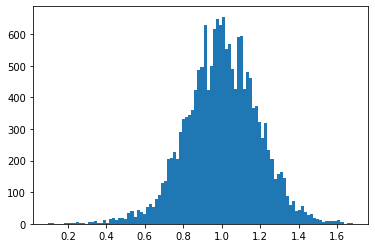

In [10]:
variation = cnv.var(axis=0) # Get the variation of all CNV

plt.hist(variation, bins = 100)
plt.show()

In [11]:
variation_filtered = variation[variation > 1.4]
len(variation_filtered)

286

In [12]:
i = variation_filtered.index
print(i)

Index(['FBXL19', 'COL4A3', 'SLC36A3', 'ATP1A1', 'SIDT2', 'SIX6', 'CNPY2',
       'RTBDN', 'GGCX', 'PRKAR2B',
       ...
       'ALDOB', 'SMARCAL1', 'TGFA', 'ACAP3', 'SMIM2', 'ETV2', 'IKZF1', 'ELF3',
       'ELF5', 'CAND2'],
      dtype='object', length=286)


In [14]:
input = cnv[i].T
input.shape

(286, 47)

In [25]:
drug_final = drug.T
print('Max value needed for output')
print(max(drug_final.max(axis=1))) # get the minimum and max numbers fo reach drug
print('Min value need for the output')
print(min(drug_final.min(axis=1))) # Get the minimum and max numbers for each drug


Max value needed for output
3.3579443062
Min value need for the output
-3.38118016504


(17, 47)

In [118]:
drug_final

,184B5,600MPE,AU565,BT20,BT474,BT483,BT549,CAMA1,HCC1143,HCC1187,...,SUM149PT,SUM159PT,SUM185PE,SUM225CWN,SUM229PE,SUM52PE,T47D,UACC812,ZR751,ZR75B
AG1478,NaN,-0.581619,0.121421,NaN,1.548178,-0.922800,-0.354165,-0.219760,-0.922800,-0.922800,...,1.300047,0.090405,-0.922800,NaN,-0.922800,-0.922800,0.069727,NaN,-0.922800,-0.922800
AZD6244,2.095471,1.382129,-0.714666,-0.714666,-0.714666,-0.714666,-0.714666,-0.714666,-0.714666,-0.714666,...,1.468594,1.836074,-0.714666,-0.714666,2.344060,0.052718,-0.714666,-0.714666,-0.228296,-0.714666
Erlotinib,2.095098,-0.836124,0.078069,1.195416,0.150624,-0.139596,-0.705525,-1.010256,-0.923190,0.353778,...,1.195416,0.078069,-1.010256,0.020025,0.107091,0.150624,-1.010256,0.049047,-1.010256,-1.010256
Fascaplysin,-0.487919,-0.438927,0.540910,-0.536911,0.002000,1.104317,-1.100318,-0.291952,-0.414431,2.696554,...,-0.806367,-0.879854,1.300285,1.275789,-0.536911,0.026496,-0.953342,NaN,-0.683887,-0.830863
GSK2126458,0.337460,0.322968,0.149062,-0.285703,0.525859,1.366404,-0.981326,-1.329138,-0.821913,0.438906,...,-0.517577,-0.532069,NaN,1.149022,0.859178,0.670780,0.656288,0.714257,0.134570,0.453398
GSK650394,2.743283,-0.655482,-0.085857,-0.085857,-0.655482,-0.085857,-0.085857,-0.655482,-0.655482,NaN,...,-0.655482,-0.085857,0.502756,NaN,2.420495,-0.085857,-0.085857,-0.655482,-0.655482,-0.655482
Lapatinib,0.143126,-0.646260,2.133753,-0.646260,2.133753,-0.646260,-0.646260,-0.646260,-0.646260,-0.646260,...,NaN,-0.646260,-0.646260,1.721899,-0.508975,-0.646260,-0.646260,2.030789,-0.646260,-0.646260
PF-4691502,-0.377874,0.752584,1.073162,-2.419447,0.060811,NaN,-0.833432,-0.226021,-0.023551,1.916787,...,0.347644,-0.242894,-0.175404,-0.141659,-1.052774,0.651349,0.668222,1.461229,1.258759,0.685094
Pemetrexed,2.018212,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,0.814849,-0.567035,-0.567035,...,-0.567035,-0.567035,-0.567035,-0.567035,0.755342,-0.567035,-0.567035,-0.567035,1.099160,-0.567035
Rapamycin,-1.563940,-1.114066,0.643254,0.326936,0.643254,1.458650,-0.966451,0.783839,-0.305699,0.755722,...,-1.177329,0.446434,-0.467372,0.889279,-1.296827,1.275889,-0.242435,0.439405,NaN,NaN


In [110]:
temp = drug_final.loc[drug_final.index[0:14]]
# temp = temp.loc[temp.index[-13]]
temp=temp.drop(labels='drug3')
temp.isnull().any(axis=0)
bolean=temp.isnull().any(axis=0)
remove = known_drugs.columns[bolean]
remove
Final_output=temp[temp.columns.drop(labels=remove)] # remove col lines with nan
print(Final_output.shape)
Final_output

(13, 18)


,AU565,BT549,CAMA1,HCC1395,HCC1428,HCC1806,HCC1954,HCC2185,HCC3153,HCC70,MCF10F,MCF7,MDAMB134VI,MDAMB175VII,MDAMB415,MDAMB453,SUM1315MO2,SUM159PT
AG1478,0.121421,-0.354165,-0.219760,-0.540263,-0.922800,-0.044000,1.000221,-0.106033,-0.922800,-0.478231,2.085797,-0.643652,-0.364504,1.455129,-0.922800,-0.922800,1.455129,0.090405
AZD6244,-0.714666,-0.714666,-0.714666,-0.584967,-0.714666,-0.714666,0.949800,-0.714666,-0.714666,0.852526,0.712019,-0.714666,1.338896,0.679594,-0.001323,-0.714666,0.657978,1.836074
Erlotinib,0.078069,-0.705525,-1.010256,-0.502371,-0.183129,0.716553,0.977751,-0.241173,-0.531393,1.282482,2.414340,-1.010256,-1.010256,0.934218,-1.010256,-0.154107,0.223179,0.078069
Fascaplysin,0.540910,-1.100318,-0.291952,-0.585903,1.716716,-0.340944,-0.389935,0.418431,-0.438927,0.418431,-0.340944,-0.022496,-0.193968,-0.120480,1.202301,0.810366,-0.855358,-0.879854
GSK2126458,0.149062,-0.981326,-1.329138,-0.995819,-0.619022,-0.662499,0.062109,0.062109,-0.894374,0.192539,0.975116,0.207031,-0.039336,1.062069,-3.097182,0.482382,0.033125,-0.532069
GSK650394,-0.085857,-0.085857,-0.655482,-0.655482,-0.655482,-0.655482,-0.085857,-0.655482,-0.085857,-0.655482,0.123006,-0.085857,-0.655482,-0.655482,-0.085857,-0.655482,2.990121,-0.085857
Lapatinib,2.133753,-0.646260,-0.646260,-0.646260,-0.646260,-0.646260,0.726586,-0.646260,-0.646260,0.417696,-0.371691,-0.646260,-0.646260,1.515972,-0.646260,0.228929,-0.577618,-0.646260
PF-4691502,1.073162,-0.833432,-0.226021,0.246409,-0.614089,-0.749069,0.010194,0.415134,-3.381180,0.735712,-0.124786,0.870692,-0.124786,0.600732,0.347644,0.010194,0.313899,-0.242894
Pemetrexed,-0.567035,-0.567035,0.814849,-0.567035,-0.567035,1.760348,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,3.115785,-0.567035,-0.567035,-0.567035,-0.567035
Rapamycin,0.643254,-0.966451,0.783839,-1.310886,0.411288,-1.894316,1.226684,1.465679,-1.022685,0.151204,-0.889129,0.094970,2.013963,1.212625,1.395387,0.425346,-0.804778,0.446434


In [117]:
# Can only have outputs between -1 and 1
scaled_final_output=Final_output/10
print('Max value needed for output')
print(max(scaled_final_output.max(axis=1))) # get the minimum and max numbers fo reach drug
print('Min value need for the output')
print(min(scaled_final_output.min(axis=1))) # Get the minimum and max numbers for each drug

Max value needed for output
0.311578483184
Min value need for the output
-0.338118016504


In [400]:
Final_input=input[input.columns.drop(labels=remove)] # remove unwante celllines from training
Final_input.shape
test1 = input['184B5']
test1=np.array(test1).reshape(len(test1),1)


In [395]:
remove

Index(['184B5', '600MPE', 'BT20', 'BT474', 'BT483', 'HCC1143', 'HCC1187',
       'HCC1419', 'HCC1569', 'HCC1937', 'HCC202', 'HCC38', 'HS578T', 'LY2',
       'MCF10A', 'MCF12A', 'MDAMB157', 'MDAMB231', 'MDAMB361', 'SKBR3',
       'SUM149PT', 'SUM185PE', 'SUM225CWN', 'SUM229PE', 'SUM52PE', 'T47D',
       'UACC812', 'ZR751', 'ZR75B'],
      dtype='object')

In [152]:
INPUT=Final_input[Final_input.columns.drop(labels=['MDAMB134VI', 'MDAMB175VII'])]
INPUT
OUTPUT=Final_output[Final_output.columns.drop(labels=['MDAMB134VI', 'MDAMB175VII'])]
OUTPUT

,AU565,BT549,CAMA1,HCC1395,HCC1428,HCC1806,HCC1954,HCC2185,HCC3153,HCC70,MCF10F,MCF7,MDAMB415,MDAMB453,SUM1315MO2,SUM159PT
AG1478,0.121421,-0.354165,-0.219760,-0.540263,-0.922800,-0.044000,1.000221,-0.106033,-0.922800,-0.478231,2.085797,-0.643652,-0.922800,-0.922800,1.455129,0.090405
AZD6244,-0.714666,-0.714666,-0.714666,-0.584967,-0.714666,-0.714666,0.949800,-0.714666,-0.714666,0.852526,0.712019,-0.714666,-0.001323,-0.714666,0.657978,1.836074
Erlotinib,0.078069,-0.705525,-1.010256,-0.502371,-0.183129,0.716553,0.977751,-0.241173,-0.531393,1.282482,2.414340,-1.010256,-1.010256,-0.154107,0.223179,0.078069
Fascaplysin,0.540910,-1.100318,-0.291952,-0.585903,1.716716,-0.340944,-0.389935,0.418431,-0.438927,0.418431,-0.340944,-0.022496,1.202301,0.810366,-0.855358,-0.879854
GSK2126458,0.149062,-0.981326,-1.329138,-0.995819,-0.619022,-0.662499,0.062109,0.062109,-0.894374,0.192539,0.975116,0.207031,-3.097182,0.482382,0.033125,-0.532069
GSK650394,-0.085857,-0.085857,-0.655482,-0.655482,-0.655482,-0.655482,-0.085857,-0.655482,-0.085857,-0.655482,0.123006,-0.085857,-0.085857,-0.655482,2.990121,-0.085857
Lapatinib,2.133753,-0.646260,-0.646260,-0.646260,-0.646260,-0.646260,0.726586,-0.646260,-0.646260,0.417696,-0.371691,-0.646260,-0.646260,0.228929,-0.577618,-0.646260
PF-4691502,1.073162,-0.833432,-0.226021,0.246409,-0.614089,-0.749069,0.010194,0.415134,-3.381180,0.735712,-0.124786,0.870692,0.347644,0.010194,0.313899,-0.242894
Pemetrexed,-0.567035,-0.567035,0.814849,-0.567035,-0.567035,1.760348,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035
Rapamycin,0.643254,-0.966451,0.783839,-1.310886,0.411288,-1.894316,1.226684,1.465679,-1.022685,0.151204,-0.889129,0.094970,1.395387,0.425346,-0.804778,0.446434


In [144]:
Final_output

,AU565,BT549,CAMA1,HCC1395,HCC1428,HCC1806,HCC1954,HCC2185,HCC3153,HCC70,MCF10F,MCF7,MDAMB134VI,MDAMB175VII,MDAMB415,MDAMB453,SUM1315MO2,SUM159PT
AG1478,0.121421,-0.354165,-0.219760,-0.540263,-0.922800,-0.044000,1.000221,-0.106033,-0.922800,-0.478231,2.085797,-0.643652,-0.364504,1.455129,-0.922800,-0.922800,1.455129,0.090405
AZD6244,-0.714666,-0.714666,-0.714666,-0.584967,-0.714666,-0.714666,0.949800,-0.714666,-0.714666,0.852526,0.712019,-0.714666,1.338896,0.679594,-0.001323,-0.714666,0.657978,1.836074
Erlotinib,0.078069,-0.705525,-1.010256,-0.502371,-0.183129,0.716553,0.977751,-0.241173,-0.531393,1.282482,2.414340,-1.010256,-1.010256,0.934218,-1.010256,-0.154107,0.223179,0.078069
Fascaplysin,0.540910,-1.100318,-0.291952,-0.585903,1.716716,-0.340944,-0.389935,0.418431,-0.438927,0.418431,-0.340944,-0.022496,-0.193968,-0.120480,1.202301,0.810366,-0.855358,-0.879854
GSK2126458,0.149062,-0.981326,-1.329138,-0.995819,-0.619022,-0.662499,0.062109,0.062109,-0.894374,0.192539,0.975116,0.207031,-0.039336,1.062069,-3.097182,0.482382,0.033125,-0.532069
GSK650394,-0.085857,-0.085857,-0.655482,-0.655482,-0.655482,-0.655482,-0.085857,-0.655482,-0.085857,-0.655482,0.123006,-0.085857,-0.655482,-0.655482,-0.085857,-0.655482,2.990121,-0.085857
Lapatinib,2.133753,-0.646260,-0.646260,-0.646260,-0.646260,-0.646260,0.726586,-0.646260,-0.646260,0.417696,-0.371691,-0.646260,-0.646260,1.515972,-0.646260,0.228929,-0.577618,-0.646260
PF-4691502,1.073162,-0.833432,-0.226021,0.246409,-0.614089,-0.749069,0.010194,0.415134,-3.381180,0.735712,-0.124786,0.870692,-0.124786,0.600732,0.347644,0.010194,0.313899,-0.242894
Pemetrexed,-0.567035,-0.567035,0.814849,-0.567035,-0.567035,1.760348,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,3.115785,-0.567035,-0.567035,-0.567035,-0.567035
Rapamycin,0.643254,-0.966451,0.783839,-1.310886,0.411288,-1.894316,1.226684,1.465679,-1.022685,0.151204,-0.889129,0.094970,2.013963,1.212625,1.395387,0.425346,-0.804778,0.446434


In [409]:
importlib.reload(NN)

<module 'NN' from '/Users/ijones1/Documents/TBD/NN.py'>

In [410]:
print(max(INPUT.max(axis=1)))
print(min(INPUT.min(axis=1)))

6.75853
-7.7725800000000005


In [411]:
((OUTPUT+5)/10)

,AU565,BT549,CAMA1,HCC1395,HCC1428,HCC1806,HCC1954,HCC2185,HCC3153,HCC70,MCF10F,MCF7,MDAMB415,MDAMB453,SUM1315MO2,SUM159PT
AG1478,0.512142,0.464584,0.478024,0.445974,0.407720,0.495600,0.600022,0.489397,0.407720,0.452177,0.708580,0.435635,0.407720,0.407720,0.645513,0.509040
AZD6244,0.428533,0.428533,0.428533,0.441503,0.428533,0.428533,0.594980,0.428533,0.428533,0.585253,0.571202,0.428533,0.499868,0.428533,0.565798,0.683607
Erlotinib,0.507807,0.429448,0.398974,0.449763,0.481687,0.571655,0.597775,0.475883,0.446861,0.628248,0.741434,0.398974,0.398974,0.484589,0.522318,0.507807
Fascaplysin,0.554091,0.389968,0.470805,0.441410,0.671672,0.465906,0.461006,0.541843,0.456107,0.541843,0.465906,0.497750,0.620230,0.581037,0.414464,0.412015
GSK2126458,0.514906,0.401867,0.367086,0.400418,0.438098,0.433750,0.506211,0.506211,0.410563,0.519254,0.597512,0.520703,0.190282,0.548238,0.503312,0.446793
GSK650394,0.491414,0.491414,0.434452,0.434452,0.434452,0.434452,0.491414,0.434452,0.491414,0.434452,0.512301,0.491414,0.491414,0.434452,0.799012,0.491414
Lapatinib,0.713375,0.435374,0.435374,0.435374,0.435374,0.435374,0.572659,0.435374,0.435374,0.541770,0.462831,0.435374,0.435374,0.522893,0.442238,0.435374
PF-4691502,0.607316,0.416657,0.477398,0.524641,0.438591,0.425093,0.501019,0.541513,0.161882,0.573571,0.487521,0.587069,0.534764,0.501019,0.531390,0.475711
Pemetrexed,0.443296,0.443296,0.581485,0.443296,0.443296,0.676035,0.443296,0.443296,0.443296,0.443296,0.443296,0.443296,0.443296,0.443296,0.443296,0.443296
Rapamycin,0.564325,0.403355,0.578384,0.368911,0.541129,0.310568,0.622668,0.646568,0.397731,0.515120,0.411087,0.509497,0.639539,0.542535,0.419522,0.544643


In [412]:
x= INPUT # The CNV info for each drug
y= ((OUTPUT+5)/10) # GI50 data for 13 drugs
nn = NN.dlnet(x, y, lr=1, d1=286, h=200, d2=13) # 286 neurons for each CNV, 50 hidden neurons, 13 output neurons

In [413]:
print(nn.X.shape)
print(nn.param['W1'].shape)
print(nn.ch['A1'].shape)
print(nn.param['W2'].shape)
print(nn.ch['Z2'].shape)
print(nn.ch['A2'].shape)
print(nn.param['b1'].shape)
nn.Y.shape

(286, 16)


KeyError: 'W1'

In [414]:
nn.gd(x, y, iter = 3000)

Cost after iteration 0: 0.018386
Cost after iteration 500: 0.000148
Cost after iteration 1000: 0.000022
Cost after iteration 1500: 0.000004
Cost after iteration 2000: 0.000001
Cost after iteration 2500: 0.000000


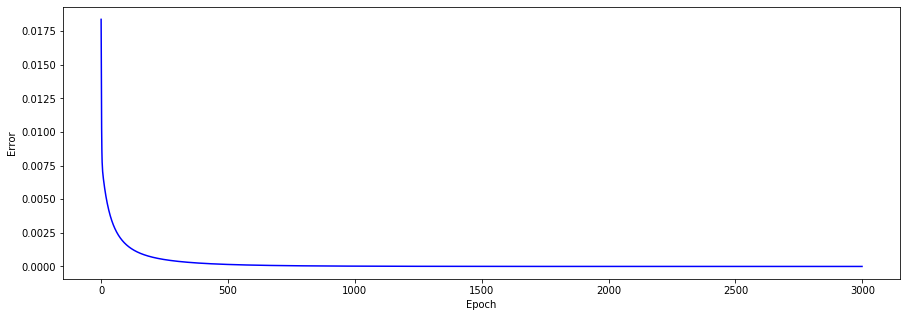

5.644928129109172e-08


In [415]:
plt.figure(figsize=(15,5))
plt.plot(nn.epoch_list, nn.error_history, color = 'blue')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()
print(nn.error_history[-1])

In [416]:
print(nn.Final_test(INPUT))
print((OUTPUT+5)/10)

[[0.51213564 0.46457966 0.47802597 0.44597545 0.40771723 0.49559509
  0.6000257  0.48939656 0.40771812 0.45216686 0.70863903 0.4356406
  0.40774293 0.40771838 0.64550074 0.5089956 ]
 [0.42847775 0.4285523  0.42855646 0.44149714 0.42857041 0.42855578
  0.59515348 0.4286015  0.42850419 0.58524436 0.5720481  0.42862222
  0.50005178 0.42865015 0.56582758 0.68189679]
 [0.50784257 0.42946134 0.39899447 0.44977809 0.48170001 0.57169617
  0.59777525 0.47589138 0.44687401 0.62828562 0.74056571 0.39895995
  0.39891809 0.48460402 0.52236021 0.50828897]
 [0.55408653 0.38996617 0.47080792 0.44141227 0.67166829 0.46590683
  0.46101262 0.54184218 0.45610704 0.54183805 0.46590242 0.49775623
  0.62023572 0.58103815 0.41446171 0.41201002]
 [0.51489702 0.40185792 0.36708243 0.40041552 0.43808498 0.43373519
  0.50620067 0.50620485 0.41056202 0.51923504 0.59768333 0.52070618
  0.19030771 0.54821667 0.50328562 0.44674162]
 [0.49142606 0.49141582 0.43445391 0.43445219 0.43445096 0.43445863
  0.49139126 0.434

In [417]:
print(nn.Final_test(test1)*10-5)

[[ 0.35437699]
 [ 0.82277763]
 [ 0.526622  ]
 [-0.87698043]
 [ 0.14552512]
 [-0.24033651]
 [ 0.13235397]
 [-0.67216996]
 [-0.78512898]
 [ 0.06160979]
 [-0.1989982 ]
 [ 0.88640486]
 [ 0.33220907]]


In [393]:
drug

,AG1478,AZD6244,Erlotinib,Fascaplysin,GSK2126458,GSK650394,Lapatinib,PF-4691502,Pemetrexed,Rapamycin,drug1,drug2,drug3,drug4,drug5,drug6,drug7
184B5,NaN,2.095471,2.095098,-0.487919,0.337460,2.743283,0.143126,-0.377874,2.018212,-1.563940,0.297294,1.082376,-1.008833,0.430721,NaN,-0.430692,-1.676279
600MPE,-0.581619,1.382129,-0.836124,-0.438927,0.322968,-0.655482,-0.646260,0.752584,-0.567035,-1.114066,-0.701476,NaN,-0.382951,0.110764,-1.802434,NaN,0.874001
AU565,0.121421,-0.714666,0.078069,0.540910,0.149062,-0.085857,2.133753,1.073162,-0.567035,0.643254,0.419096,0.805461,-0.781240,0.134464,0.780081,0.704933,NaN
BT20,NaN,-0.714666,1.195416,-0.536911,-0.285703,-0.085857,-0.646260,-2.419447,-0.567035,0.326936,-0.847637,-0.662188,NaN,-0.197343,NaN,NaN,NaN
BT474,1.548178,-0.714666,0.150624,0.002000,0.525859,-0.655482,2.133753,0.060811,-0.567035,0.643254,NaN,-1.603698,0.254311,0.809930,-0.266577,0.279074,0.251981
BT483,-0.922800,-0.714666,-0.139596,1.104317,1.366404,-0.085857,-0.646260,NaN,-0.567035,1.458650,1.856350,NaN,-0.849518,1.580197,0.666314,-2.531599,-1.629628
BT549,-0.354165,-0.714666,-0.705525,-1.100318,-0.981326,-0.085857,-0.646260,-0.833432,-0.567035,-0.966451,-0.871998,0.085482,0.811915,-0.896509,0.529793,0.761715,0.329734
CAMA1,-0.219760,-0.714666,-1.010256,-0.291952,-1.329138,-0.655482,-0.646260,-0.226021,0.814849,0.783839,-0.652755,0.334706,-1.259186,-1.643076,0.370519,0.165511,0.594092
HCC1143,-0.922800,-0.714666,-0.923190,-0.414431,-0.821913,-0.655482,-0.646260,-0.023551,-0.567035,-0.305699,NaN,-0.108358,0.038097,-0.778006,-1.210845,-0.260348,0.251981
HCC1187,-0.922800,-0.714666,0.353778,2.696554,0.438906,NaN,-0.646260,1.916787,-0.567035,0.755722,-0.019389,0.390089,-0.974694,0.051512,0.097478,0.449418,NaN


In [ ]:

# mlp for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot


In [ ]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()